In [19]:
import numpy as np
import pandas as pd
import mne
from pydeconv.utils import *
from pydeconv import *
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load parameter, data and features
data_path = "./example_data/"
settings = analyze_data()
features = pd.read_csv(data_path + "629959_full_metadata.csv") 
print(features.shape)
raw     = mne.io.read_raw_eeglab(data_path + "629959_analysis.set", preload=True)

# Initialize the model

rERP_model = PyDeconv(settings = settings , features = features, eeg = raw)
X_design = rERP_model.create_matrix()

Analyzing data with model: targMin
Time range: -0.2 to 0.3
Solver: ridge
(6189, 30)
Reading /home/dac/Documents/Repos/PyDeconv/example_data/629959_analysis.fdt
Reading 0 ... 1389499  =      0.000 ...  2778.998 secs...


/tmp/ipykernel_3739322/172445330.py:14: RuntimeWarning: Unknown types found, setting as type EEG:
eye: ['L-AREA', 'L-GAZE-X', 'L-GAZE-Y', 'TIME']
  raw     = mne.io.read_raw_eeglab(data_path + "629959_analysis.set", preload=True)
/tmp/ipykernel_3739322/172445330.py:14: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw     = mne.io.read_raw_eeglab(data_path + "629959_analysis.set", preload=True)



Model Name: targMin
First Intercept Event Type: fixation
Second Intercept Event Type: saccade
Sampling Frequency: 500.0
Time Window: -0.2 to 0.3
Channels to Analyze: 64

Model Description:
Intercept: True
Additive Features: ['ontarget']
Interactions: None

creating default splines: 5 cubic B-splines matrix

Original Design Matrix Shape:
X_design shape: (1389500, 1757)
y_data shape: (1389500, 64)



In [20]:

import pandas as pd
import mne
from pydeconv.utils import *
from pydeconv import *
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error


# Load parameter, data and features
#==================================
data_path = "./example_data/"
settings = analyze_data()
features = pd.read_csv(data_path + "629959_full_metadata.csv") 
raw     = mne.io.read_raw_eeglab(data_path + "629959_analysis.set", preload=True)

# Initialize the model
#=====================
rERP_model = PyDeconv(settings = settings , features = features, eeg = raw)
X_design = rERP_model.create_matrix()
y_data   = rERP_model.get_nonzero_data()

# Model Selection 
#================
solver = rERP_model.estimator
num_folds = 5
alphas = np.linspace(5, 100, 6)
param_grid = {'alpha': alphas.tolist()}
# Create StratifiedKFold object
kf = KFold(n_splits=num_folds)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=solver, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf,verbose=5)
grid_search.fit(X_design, y_data)
# rERP_model.estimator.set_params(alpha = 40)
# rERP_model.fit(X_design, y_data)


Analyzing data with model: targMin
Time range: -0.2 to 0.3
Solver: ridge
Reading /home/dac/Documents/Repos/PyDeconv/example_data/629959_analysis.fdt
Reading 0 ... 1389499  =      0.000 ...  2778.998 secs...


/tmp/ipykernel_3739322/851461282.py:14: RuntimeWarning: Unknown types found, setting as type EEG:
eye: ['L-AREA', 'L-GAZE-X', 'L-GAZE-Y', 'TIME']
  raw     = mne.io.read_raw_eeglab(data_path + "629959_analysis.set", preload=True)
/tmp/ipykernel_3739322/851461282.py:14: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw     = mne.io.read_raw_eeglab(data_path + "629959_analysis.set", preload=True)



Model Name: targMin
First Intercept Event Type: fixation
Second Intercept Event Type: saccade
Sampling Frequency: 500.0
Time Window: -0.2 to 0.3
Channels to Analyze: 64

Model Description:
Intercept: True
Additive Features: ['ontarget']
Interactions: None

creating default splines: 5 cubic B-splines matrix

Original Design Matrix Shape:
X_design shape: (1389500, 1757)
y_data shape: (1389500, 64)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........................alpha=5.0;, score=-0.000 total time=  25.0s
[CV 2/5] END ........................alpha=5.0;, score=-0.000 total time=  23.8s
[CV 3/5] END ........................alpha=5.0;, score=-0.000 total time=  25.0s
[CV 4/5] END ........................alpha=5.0;, score=-0.000 total time=  24.0s
[CV 5/5] END ........................alpha=5.0;, score=-0.000 total time=  24.6s
[CV 1/5] END .......................alpha=24.0;, score=-0.000 total time=  19.3s
[CV 2/5] END .......................alpha=24.0;, scor

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [5.0, 24.0, 43.0, 62.0, 81.0, 100.0]},
             scoring='neg_mean_squared_error', verbose=5)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


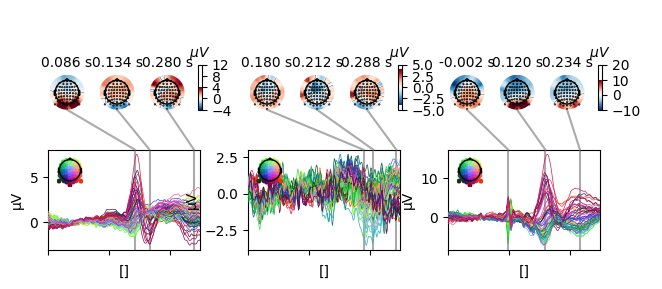

In [21]:
# # Extract results
# #================
cv_results = grid_search.cv_results_
best_model = grid_search.best_estimator_
rERP_model.coef_ = best_model.coef_

fig = rERP_model.plot_coefs()
plt.show()

# rERP_model.coef_.shape
# rERP_model.plot_coefs()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


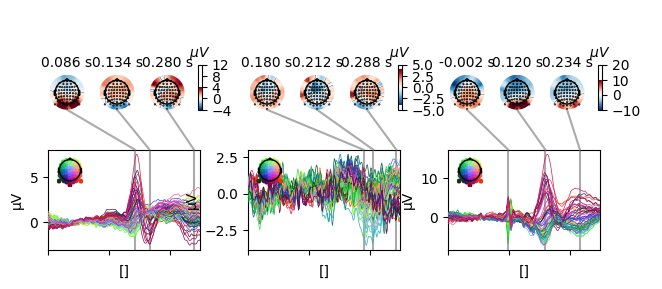

In [22]:
plot_coefs(rERP_model)

In [17]:
def plot_coefs(model):
    list_of_coeffs = model.feature_names[:-4]
    plot_model_results(model,list_of_coeffs, figsize=[10,5],top_topos=True)

def plot_model_results(deconv_model ,list_of_coeffs, figsize=[10,8],top_topos=True):
    # to use with PyDeconv repo
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec
    import numpy as np
    import matplotlib.colors as mcolors
    from matplotlib.ticker import FuncFormatter
    x_lims = (deconv_model.tmin, deconv_model.tmax)

    vlims = [(-4,4),(-4,4),(-10,10),(-4,4),(-6,6)]
    joint_ylims = dict(eeg=[-4, 4])
    top_slide = 0.02
    horizontal_jump = 0.2
    
    fig = plt.figure(constrained_layout=False,figsize=figsize) 

    jump=0
    for coeff in list_of_coeffs:
        n_coeff = list_of_coeffs.index(coeff)
        data = deconv_model.coef_[:,deconv_model.delays_*n_coeff:deconv_model.delays_*(n_coeff+1)]
        base_lims = [-.2, 0 ]
        times = np.linspace(deconv_model.tmin,deconv_model.tmax,deconv_model.delays_)
        eeg = deconv_model.data
        info = eeg.pick_channels(eeg.ch_names[:deconv_model.chans_to_ana]).info

        # Create an Evoked object from the data and info
        grand_avg = mne.EvokedArray(data, info,tmin=times[0],baseline=(None, 0), verbose=False)
        grand_avg.nave = None

        if top_topos:
            ax_topo1 = fig.add_axes((0.033+jump*horizontal_jump, 0.75, 0.038, 0.07))
            ax_topo2 = fig.add_axes((0.033+jump*horizontal_jump+top_slide+0.03, 0.75, 0.038, 0.07))
            ax_topo3 = fig.add_axes((0.033+jump*horizontal_jump+top_slide*2+0.03*2, 0.75, 0.038, 0.07))
            ax_topo_cb = fig.add_axes((0.033+jump*horizontal_jump+top_slide*3+0.03*3, 0.75, 0.004, 0.09))
            axs_topos = [ax_topo1, ax_topo2, ax_topo3, ax_topo_cb]
        # 
        ax_frp = fig.add_axes((0.033+jump*horizontal_jump, 0.47, 0.152, 0.2))
        jump+=1
 

        if top_topos:
            grand_avg.plot_joint(title="",ts_args={'xlim': x_lims,'axes':ax_frp,'titles':dict(eeg=''),'window_title':''},
                                        topomap_args={'vlim':vlims[n_coeff],'contours':2,'axes':axs_topos,'size':.8},
                                        show=False)
        else:
            if n_coeff ==2:
                xmax = .85
            else:
                xmax = .85
            grand_avg.plot(axes=ax_frp,titles=dict(eeg=''),window_title='',xlim= (-.1,xmax),ylim=joint_ylims,
                            show=False)
            

        # clean axis
        ax_frp.set_xlabel([])
        ax_frp.set_xticklabels([])
        ax_frp.set_title('')
        if top_topos:
            ax_cb = axs_topos[-1]
            ax_cb.set_title(f'$\mu V$')
                # topos fonts
            for top in axs_topos:
                top.title.set_fontsize(10)
                # top.set_title('')

        fig.set_label('')
        fig.legends = []

        ax_frp.set_title('')
    ch = fig.get_children()
    for ax in ch:
        childs = ax.get_children()
        for c in childs:
            if isinstance(c,plt.Text):
                if '(64' in c.get_text():
                    c.remove()
    # plt.legend('')
    # child = fig.get_children()
    # ax_erase = child[10].remove()
    return fig

In [13]:
best_model

Ridge(alpha=24.0)

In [12]:
np.linspace(5, 100, 6)

array([  5.,  24.,  43.,  62.,  81., 100.])